**Lab 1**

Langkah 1 - Import Library

In [ ]:
# import library
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

Langkah 2 - Membuat Data Dummy

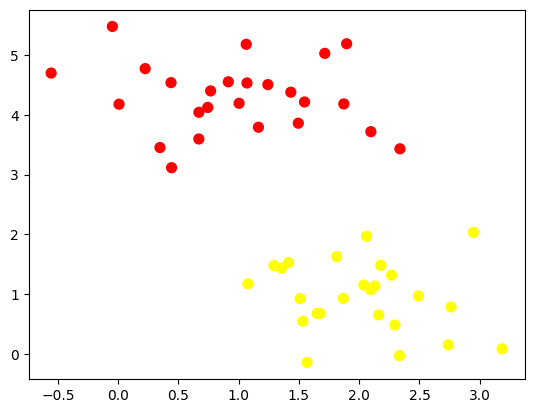

In [ ]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

Langkah 4 - Ilustrasi Margin

(-1.0, 3.5)

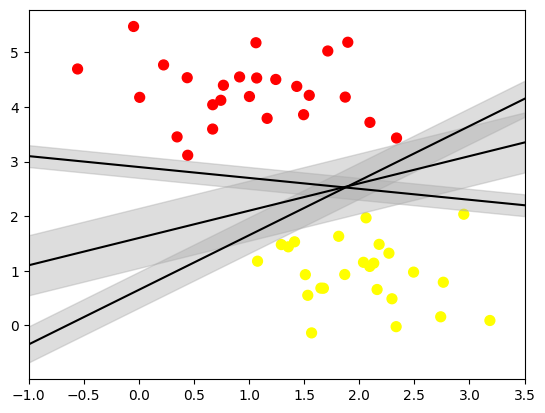

In [ ]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5)

Langkah 5 - Fitting Model

In [ ]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

In [ ]:
# buat sebuah fungsi untuk menampilkan fitting data

def plot_svc_decision_function(model, ax=None, plot_support=True):

    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # buat grid untuk evaluasi model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot batas dan margin
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

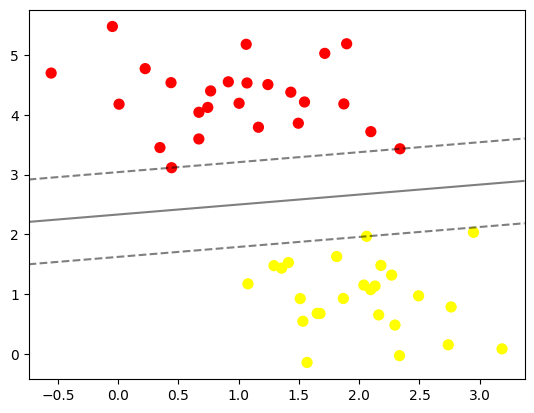

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model)

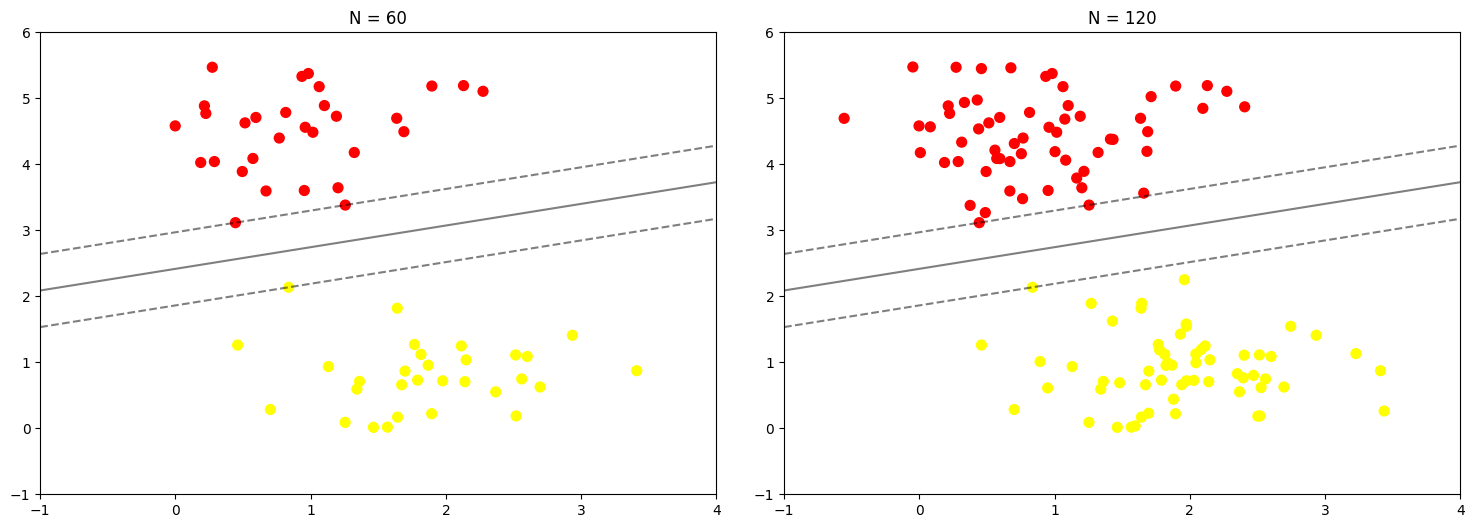

In [ ]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)

    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

In [ ]:
# jumlah data dapat dipilih di antara 10 atau 200 buah data, telihat tidak ada perubahan pada model

from ipywidgets import interact, fixed
interact(plot_svm, N=[10, 200], ax=fixed(None))

interactive(children=(Dropdown(description='N', options=(10, 200), value=10), Output()), _dom_classes=('widget…

<function __main__.plot_svm(N=10, ax=None)>

**Lab 2**

Langkah 1 - Ilustrasi Data Non-Linier

Langkah 1a - Import Library

In [ ]:
# import library
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.svm import SVC

Langkah 1b - Buat Kembali Fungsi Plotting

In [ ]:
# buat sebuah fungsi untuk menampilkan fitting data

def plot_svc_decision_function(model, ax=None, plot_support=True):

    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # buat grid untuk evaluasi model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot batas dan margin
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

Langkah 1c - Buat Data Dummy Non-Linier

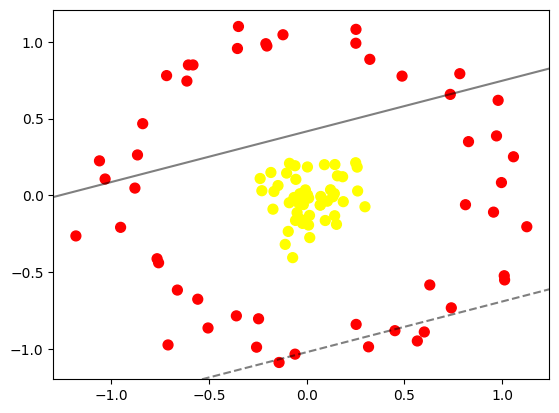

In [ ]:
# contoh data tidak terpisah secara linier
from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

In [ ]:
r = np.exp(-(X**2).sum(1))

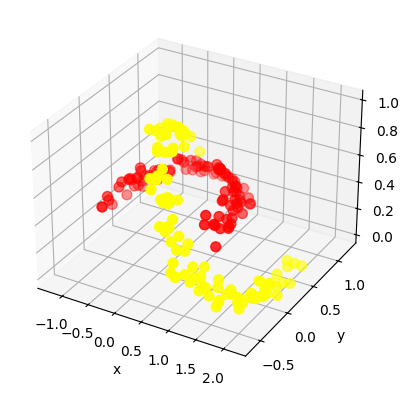

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

# Contoh data
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200, noise=0.1, random_state=42)

# Definisikan r
r = np.exp(-(X**2).sum(1))

# Plot 3D statis
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('r')
plt.show()


In [ ]:
r = np.exp(-(X**2).sum(1))

In [ ]:
from mpl_toolkits import mplot3d
from ipywidgets import interact, fixed

def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=[-90, 45, 30, 20 , 10], azip=(-180, 180),
         X=fixed(X), y=fixed(y))

interactive(children=(Dropdown(description='elev', index=2, options=(-90, 45, 30, 20, 10), value=30), IntSlide…

<function __main__.plot_3D(elev=30, azim=30, X=array([[ 0.00415788,  0.1854142 ],
       [ 0.97939958,  0.61905057],
       [ 0.3165832 , -0.98519836],
       [ 0.48799494,  0.7766489 ],
       [ 0.14332667, -0.13206124],
       [ 0.25085646,  0.21284898],
       [-0.02082829, -0.18183577],
       [ 0.12220343,  0.03692326],
       [ 0.73987122, -0.73140282],
       [ 0.1061079 , -0.03724651],
       [ 0.25168969,  0.99063099],
       [ 0.73459668,  0.65768822],
       [-0.17226679, -0.08925362],
       [ 1.05781806,  0.25175123],
       [ 0.95588345, -0.10857106],
       [ 0.18407062,  0.12186511],
       [-0.66108404, -0.61570565],
       [-0.05687354, -0.16247487],
       [-0.95150547, -0.20750782],
       [-0.87826116,  0.04793579],
       [-0.22905283,  0.03079464],
       [-0.01690698, -0.05931158],
       [-0.05930372, -1.03277901],
       [-0.04051587, -0.04946452],
       [ 0.81238711, -0.06022401],
       [-0.25612723, -0.98738225],
       [ 0.01024739, -0.01700292],
       [ 0.25318384, -0.83924661],
       [-0.0342417 , -0.15335371],
       [-0.10963019, -0.31844155],
       [-0.0940907 , -0.23398173],
       [-0.08763919,  0.2090644 ],
       [ 0.13374772, -0.00883964],
       [ 0.2585055 ,  0.18447242],
       [-0.04545597, -0.02193825],
       [ 0.78335639,  0.79244023],
       [ 0.18733974, -0.04042405],
       [ 0.29833796, -0.07361557],
       [-0.08880312, -0.04723973],
       [-0.23781645,  0.11038261],
       [-0.03473316,  0.01094424],
       [-0.35390163,  0.95632302],
       [-0.75722627, -0.43805605],
       [-0.58135935,  0.84934333],
       [ 0.3231496 ,  0.88584753],
       [ 0.06966642, -0.06103416],
       [-0.60459843,  0.84922991],
       [ 0.01476927, -0.13003874],
       [ 0.15260713, -0.18800967],
       [-0.05517559,  0.10476988],
       [-0.50435058, -0.86242212],
       [ 1.12602585, -0.20358078],
       [ 0.00980294, -0.19263702],
       [-0.76492573, -0.41184475],
       [ 0.07219841, -0.00646193],
       [-0.12103332,  1.04578664],
       [ 0.56610311, -0.94703214],
       [-0.1023494 ,  0.14559076],
       [ 0.14160922,  0.01214045],
       [ 0.1446304 ,  0.20113757],
       [-0.00644364,  0.03614764],
       [-0.34871804,  1.09967125],
       [-1.18014232, -0.26341484],
       [ 1.01060899, -0.522441  ],
       [-0.02321093, -0.02414486],
       [ 0.09098289,  0.20028801],
       [ 0.60176202, -0.88845427],
       [-1.03068868,  0.10701451],
       [-0.55686062, -0.6751851 ],
       [-0.18277246,  0.14953434],
       [-0.203365  ,  0.97252508],
       [-0.04892477, -0.11176627],
       [ 0.99633107,  0.08387338],
       [ 0.26084469,  0.02914646],
       [-0.14103276, -1.08696776],
       [-0.83841776,  0.46709922],
       [ 0.00442661,  0.00419831],
       [-0.05964478,  0.19334442],
       [-0.2085838 ,  0.98753232],
       [ 0.0952903 , -0.16300958],
       [ 1.01250656, -0.54971257],
       [-0.70887456, -0.97271801],
       [ 0.01594682, -0.27433509],
       [ 0.97106309,  0.38757785],
       [-0.14641267,  0.06437854],
       [-0.35943614, -0.78353217],
       [-0.07142674, -0.40472547],
       [ 0.45148872, -0.88001039],
       [-1.05951455,  0.22522119],
       [ 0.62985762, -0.58243308],
       [ 0.15753786,  0.12779035],
       [-0.24589758, -0.80258374],
       [-0.61244815,  0.74441662],
       [ 0.82788586,  0.35026781],
       [-0.86510251,  0.26373884],
       [ 0.25239752,  1.08092836],
       [ 0.06995357, -0.06322436],
       [-0.71628869,  0.77998198],
       [-0.06454017, -0.01323672],
       [-0.16701521,  0.02595137]]), y=array([1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1]))>

Langkah 2 - Fitting Model

In [ ]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

SVC(C=1000000.0)

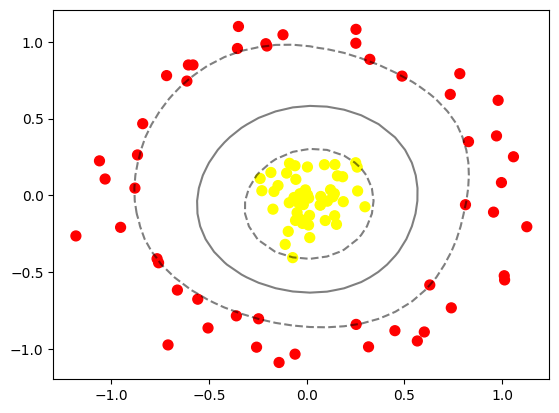

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none')

**Lab 3**

Langkah 1 - Import Library dan Buat Fungsi Plotting

In [ ]:
# import library
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.svm import SVC
from sklearn.datasets import make_blobs

In [ ]:
# buat sebuah fungsi untuk menampilkan fitting data

def plot_svc_decision_function(model, ax=None, plot_support=True):

    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # buat grid untuk evaluasi model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot batas dan margin
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

Langkah 2 - Buat Data Dummy

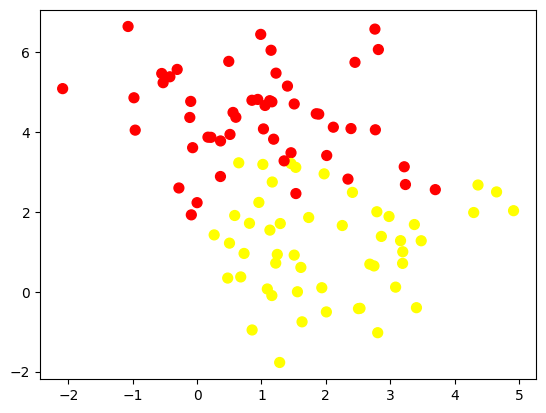

In [ ]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

Langkah 3 - Analisis Dampak Tunning

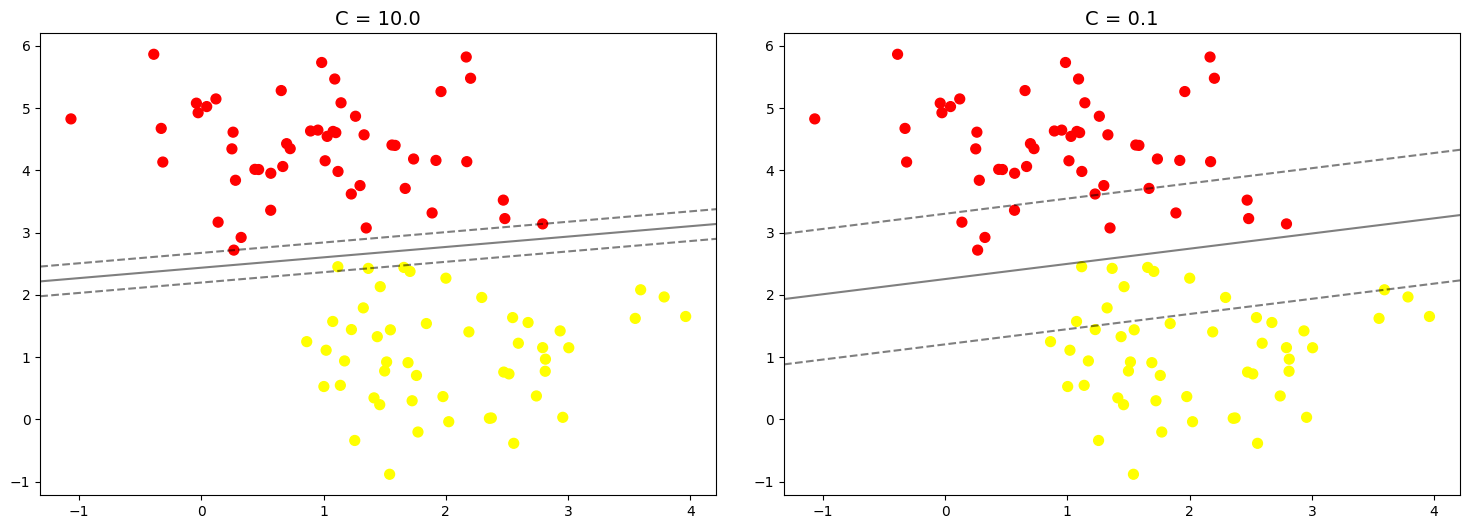

In [ ]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)

**Lab 4**

Langkah 0 - Unduh Dataset

In [ ]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(len(faces.target_names))
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
8
(1348, 62, 47)


Langkah 1 - Inspeksi Citra Wajah

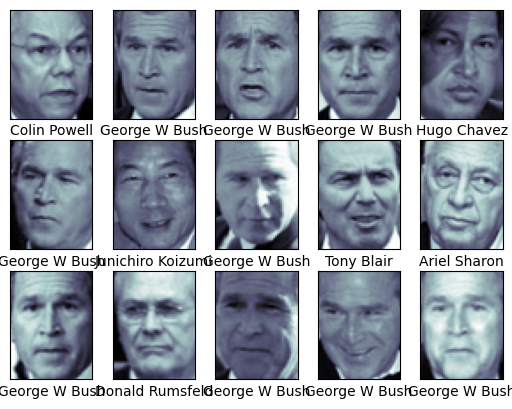

In [ ]:
# contoh wajah yang digunakan
from matplotlib import pyplot as plt

fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

Langkah 2 - Pra Pengolahan Data

In [ ]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline

pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')

# Pipeline digunakan untuk melakukan proses secara bertahap dalam
# 1 eksekusi fungsi secara langsung
model = make_pipeline(pca, svc)

Langkah 3 - Split Data

In [ ]:
# pemisahan data training dan data testing

from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target, random_state=42)

Langkah 4 - Pembuatan Model + Tunning

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)
print(grid.best_score_)

CPU times: user 2min 21s, sys: 506 ms, total: 2min 22s
Wall time: 1min 34s
{'svc__C': 5, 'svc__gamma': 0.001}
0.828893332683022


Langkah 5 - Cek Hasil Prediksi

In [ ]:
model = grid.best_estimator_
yfit = model.predict(Xtest)

Text(0.5, 0.98, 'Predicted Names; Incorrect Labels in Red')

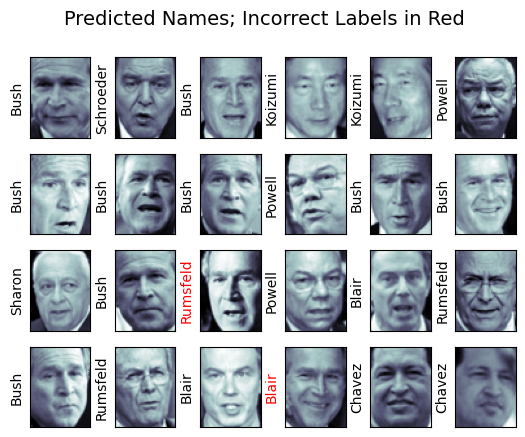

In [ ]:
fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit,
                            target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.87      0.74        15
     Colin Powell       0.83      0.88      0.86        68
  Donald Rumsfeld       0.70      0.84      0.76        31
    George W Bush       0.97      0.80      0.88       126
Gerhard Schroeder       0.76      0.83      0.79        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.86      1.00      0.92        12
       Tony Blair       0.82      0.98      0.89        42

         accuracy                           0.85       337
        macro avg       0.82      0.86      0.83       337
     weighted avg       0.86      0.85      0.85       337



Text(113.92222222222219, 0.5, 'predicted label')

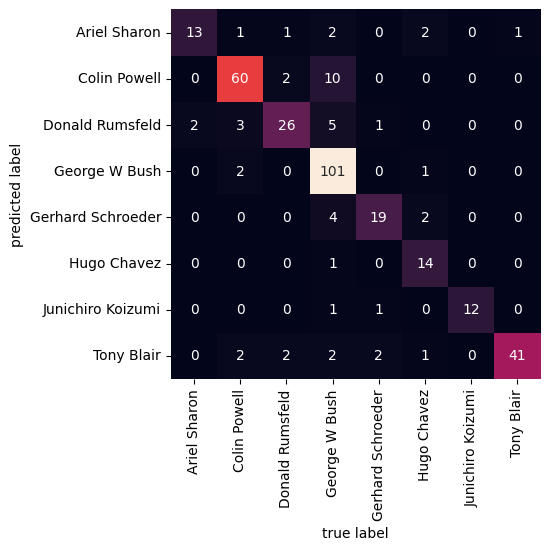

In [ ]:
# bentuk confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

*Lab 5*

Langkah 0 - Import Library

In [ ]:
# Import Required Libraries
from pathlib import Path
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2
import random
import numpy as np
import pandas as pd

In [ ]:
# Image directories
train_dir = "/content/drive/MyDrive/images/training"
test_dir = "/content/drive/MyDrive/images/test"

In [ ]:
def load_dataset(img_dir):
    p = Path(img_dir)
    dirs = p.glob('*')

    img_list = []

    for dir in dirs:
        label = str(dir).split('/')[-1]
        for file in dir.glob('*.jpg'):
            img = mpimg.imread(file)

            if not img is None:
                img_list.append((img, label))

    return img_list

In [ ]:
# Load training data
train_img = load_dataset(train_dir)

In [ ]:
# Check the first data
# It should be a tuple consist of arrays of image and image labels
train_img[0]

(array([[[78, 79, 71],
         [75, 76, 68],
         [72, 73, 65],
         ...,
         [63, 61, 62],
         [70, 68, 69],
         [75, 73, 74]],
 
        [[76, 77, 69],
         [74, 75, 67],
         [71, 72, 64],
         ...,
         [51, 49, 50],
         [55, 53, 54],
         [58, 56, 57]],
 
        [[74, 75, 67],
         [72, 73, 65],
         [70, 71, 63],
         ...,
         [43, 41, 42],
         [44, 42, 43],
         [45, 43, 44]],
 
        ...,
 
        [[92, 83, 76],
         [92, 83, 76],
         [91, 82, 75],
         ...,
         [69, 57, 43],
         [69, 57, 43],
         [69, 57, 43]],
 
        [[92, 83, 78],
         [91, 82, 77],
         [91, 82, 77],
         ...,
         [69, 57, 45],
         [69, 57, 45],
         [69, 57, 45]],
 
        [[91, 82, 77],
         [91, 82, 77],
         [91, 82, 77],
         ...,
         [69, 57, 45],
         [69, 57, 45],
         [69, 57, 45]]], dtype=uint8),
 'night')

In [ ]:
# Random size checking
pick_random = np.random.randint(0, len(train_img))

# Check img size
print(f'Image {pick_random}')
print(train_img[pick_random][0].shape)

Image 217
(372, 640, 3)


In [ ]:
# Function to Visualize
def random_img_viz(img_list):
    rand_num = np.random.randint(0, len(img_list))

    img = img_list[rand_num][0]
    label = img_list[rand_num][1]
    label_str = 'day' if label == 1 else 'night'

    plt.imshow(img)
    print(f'Shape\t: {img.shape}')
    print(f'Label\t: {label}')

Shape	: (458, 800, 3)
Label	: day


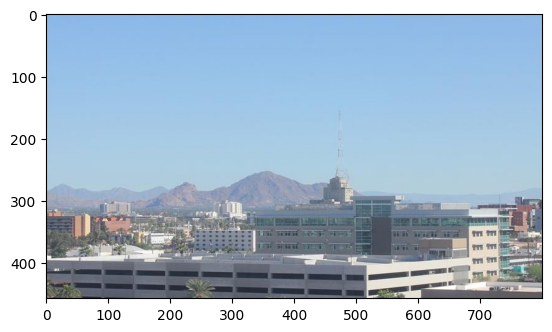

In [ ]:
random_img_viz(train_img)

In [ ]:
def standarized_input(image):
    # resize to w: 1100, h:600
    std_img = cv2.resize(image, (1100,600))

    return std_img

In [ ]:
def label_encoder(label):
    # Encode the label
    # day as 1; night as 0
    num_val = 0

    if(label == 'day'):
        num_val = 1

    return num_val

In [ ]:
def preprocess(img_list):
    std_img_list = []

    for item in img_list:
        image = item[0]
        label = item[1]

        # Standarized the image
        std_img = standarized_input(image)

        # Create the label
        img_label = label_encoder(label)

        std_img_list.append((std_img, img_label))

    return std_img_list

In [ ]:
train_std_img_list = preprocess(train_img)

In [ ]:
# Random size checking
pick_random = np.random.randint(0, len(train_std_img_list))

# Check img size
print(f'Image {pick_random}')
print(train_std_img_list[pick_random][0].shape)

Image 157
(600, 1100, 3)


Shape	: (600, 1100, 3)
Label	: night


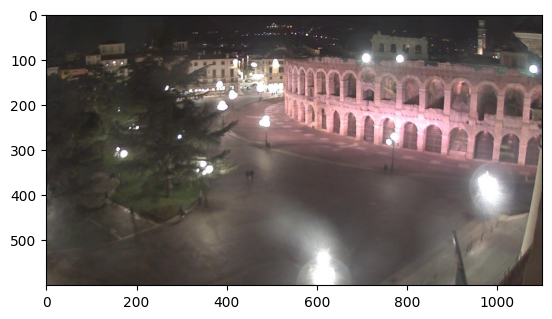

In [ ]:
# Function to Visualize
def random_img_viz(img_list):
    rand_num = np.random.randint(0, len(img_list))

    img = img_list[rand_num][0]
    label = img_list[rand_num][1]
    label_str = 'day' if label == 1 else 'night'

    plt.imshow(img)
    print(f'Shape\t: {img.shape}')
    print(f'Label\t: {label_str}')

random_img_viz(train_std_img_list)

Langkah 5 - Klasifikasi dengan Metode Threshold


In [ ]:
def predict_label(img, threshold):
    # Computer average brightness
    avg = avg_brightness(img)
    pred = 0

    # Predict the label based on user defined threshold
    if avg > threshold:
        pred = 1

    return pred

Image 32
Actual label: 0
Predicted label: 0


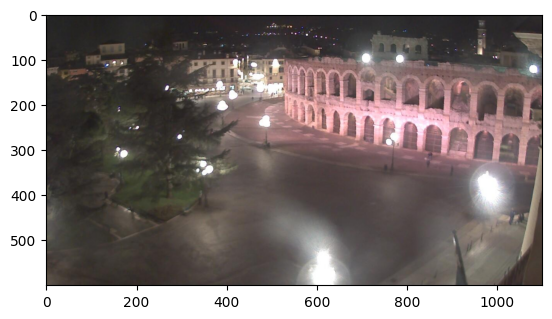

In [ ]:
# Test the classifier on train data
rand_img = np.random.randint(0, len(train_std_img_list))

pred = predict_label(train_std_img_list[rand_img][0], threshold=120)

# Evaluate
print(f'Image {rand_img}')
print(f'Actual label: {train_std_img_list[rand_img][1]}')
print(f'Predicted label: {pred}')
plt.imshow(train_std_img_list[rand_img][0])

Langkah 6 - Evaluasi Manual

In [ ]:
def evaluate(img_list, threshold):
    miss_labels = []

    for file in img_list:
        # Get the ground truth / correct label
        img = file[0]
        label = file[1]

        # Get prediction
        pred_label = predict_label(img, threshold)

        # Compare ground truth and pred
        if pred_label != label:
            miss_labels.append((img, pred_label, label))

    total_img = len(img_list)
    corr_pred = total_img - len(miss_labels)
    accuracy = corr_pred / total_img

    print(f'Accuracy: {accuracy:.4f}')

In [ ]:
# Evaluate on train data
evaluate(train_std_img_list, threshold=120)

Accuracy: 0.7208


In [ ]:
# Evaluate on test data

# Load test data
test_img = load_dataset(test_dir)

# Preprocess
test_std_img_list = preprocess(test_img)

# Predict
evaluate(test_std_img_list, threshold=120)

Accuracy: 0.7812


Klasifikasi dengan SVM

Langkah 4 Alternatif - Membuat Feature Vectors.


In [ ]:
# Create function to extract feature for every images and stored in tabular data
# Stored in Pandas dataframe
def extract_avg_bright_feature(img_list):
    avg_list = []
    labels = []

    for img in img_list:
        img_avg = avg_brightness(img[0]) # Get the avg brightness from image
        img_label = img[1] # Get the image label

        avg_list.append(img_avg)
        labels.append(img_label)

    # Stack data in columcular way
    data = np.column_stack((avg_list, labels))
    # Create a Pandas dataframe
    df = pd.DataFrame(data, columns=['AVG_BRIGHT', 'LABELS'])

    return df

In [ ]:
# Extract feature on train data
train_avg_img = extract_avg_bright_feature(train_std_img_list)
print(f'Shape: {train_avg_img.shape}')
train_avg_img.head()

Shape: (240, 2)


,AVG_BRIGHT,LABELS
0,89.719456,0.0
1,82.323244,0.0
2,23.960470,0.0
3,90.348468,0.0
4,90.291774,0.0


In [ ]:
# Do the same thing on test data
test_avg_img = extract_avg_bright_feature(test_std_img_list)
print(f'Shape: {test_avg_img.shape}')
test_avg_img.head()

Shape: (160, 2)


,AVG_BRIGHT,LABELS
0,31.374041,0.0
1,32.149091,0.0
2,28.890044,0.0
3,11.784255,0.0
4,31.076198,0.0


Langkah 5 - Buat Model SVM

In [ ]:
# import requied library
from sklearn.svm import SVC

# Split data and label
X_train = train_avg_img.iloc[:,0].values.reshape(-1,1)
y_train = train_avg_img.iloc[:,1]
X_test = test_avg_img.iloc[:,0].values.reshape(-1,1)
y_test = test_avg_img.iloc[:,1]

model = SVC()
model.fit(X_train, y_train)

SVC()

Langkah 6 - Evaluasi

In [ ]:
from sklearn.metrics import accuracy_score

# Make a prediction on train data
y_train_pred = model.predict(X_train)

# Get the accuracy on train data
acc_train = accuracy_score(y_train, y_train_pred)

# Make a prediction on test data
y_test_pred = model.predict(X_test)

# Get the accuracy on test data
acc_test = accuracy_score(y_test, y_test_pred)

# Print Eval Result
print(f'Accuracy on train: {acc_train}')
print(f'Accuracy on test: {acc_test}')

Accuracy on train: 0.9875
Accuracy on test: 0.95


**Tugas Lab**


1. Buatlah model SVM dengan menggunakan data voice.csv dengan ketentuan,

      a. Split data dengan rasio 70:30 dan 80:20 untuk setiap model yang akan dibangun.

        i. Gunakan model dengan kernel linier.
        ii. Gunakan model dengan kernel polynomial.
        iii. Gunakan model dengan kernel RBF.
      b. Tabulasikan performansi setiap split dan kernel berdasarkan metrik akurasi.
  
  2. Gunakan data pada praktikum 5 untuk membuat model klasifikasi siang dan malam menggunakan SVM dengan kernel RBF menggunakan fitur histrogram. Gunakan rasio 80:20. Anda dapat bereksperimen dengan hyperparameter tunning dari kernel RBF. Catat performansi akurasinya!

In [ ]:
# Import library
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score

# 1️ Load dataset
df = pd.read_csv("voice.csv")
print("Jumlah data:", df.shape)
df.head()

# 2️ Pisahkan fitur dan label
X = df.drop(columns=['label'])
y = LabelEncoder().fit_transform(df['label'])

# 3️ Standarisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4️ Evaluasi SVM dengan berbagai kernel dan rasio data
results = []
splits = [(0.7, 0.3), (0.8, 0.2)]
kernels = ['linear', 'poly', 'rbf']

for train_ratio, test_ratio in splits:
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y, test_size=test_ratio, random_state=42
    )
    for kernel in kernels:
        svm = SVC(kernel=kernel, random_state=42)
        svm.fit(X_train, y_train)
        y_pred = svm.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        results.append({
            'Split': f"{int(train_ratio*100)}:{int(test_ratio*100)}",
            'Kernel': kernel,
            'Accuracy': acc
        })

# 5️ Tampilkan hasil dalam tabel
results_df = pd.DataFrame(results)
print("\nHasil akurasi tiap model:")
print(results_df)


Jumlah data: (3168, 21)

Hasil akurasi tiap model:
   Split  Kernel  Accuracy
0  70:30  linear  0.970557
1  70:30    poly  0.956887
2  70:30     rbf  0.981073
3  80:20  linear  0.976341
4  80:20    poly  0.968454
5  80:20     rbf  0.982650


Memproses night: 100%|██████████| 80/80 [00:01<00:00, 43.78it/s]



Best Parameters: {'C': 10, 'gamma': 0.01}
Best Accuracy: 0.7625

Classification Report:
              precision    recall  f1-score   support

         day       0.98      0.54      0.69        80
       night       0.68      0.99      0.81        80

    accuracy                           0.76       160
   macro avg       0.83      0.76      0.75       160
weighted avg       0.83      0.76      0.75       160



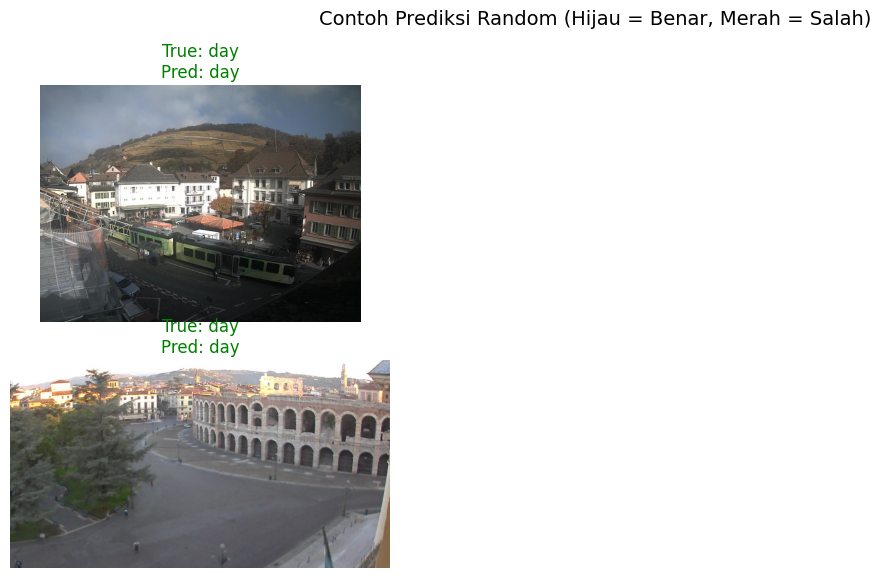

In [ ]:
# ==========================================
# ✅ SVM RBF - Klasifikasi Siang vs Malam
# Menggunakan dataset pada Google Drive
# ==========================================

import numpy as np
import cv2
import os
import random
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from tqdm import tqdm

# Path dataset
train_dir = "/content/drive/MyDrive/images/training"
test_dir = "/content/drive/MyDrive/images/test"

# Fungsi untuk ekstraksi histogram warna
def extract_color_histogram(image_path, bins=(8, 8, 8)):
    image = cv2.imread(image_path)
    image = cv2.resize(image, (128, 128))
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    hist = cv2.calcHist([hsv], [0, 1, 2], None, bins,
                        [0, 180, 0, 256, 0, 256])
    cv2.normalize(hist, hist)
    return hist.flatten()

# Fungsi untuk membaca semua gambar dari folder day/night
def load_dataset(base_dir):
    features, labels = [], []
    for label in ["day", "night"]:
        path = os.path.join(base_dir, label)
        for img_name in tqdm(os.listdir(path), desc=f"Memproses {label}"):
            img_path = os.path.join(path, img_name)
            try:
                hist = extract_color_histogram(img_path)
                features.append(hist)
                labels.append(label)
            except:
                continue
    return np.array(features), np.array(labels)

# Load training dan test set
X_train, y_train = load_dataset(train_dir)
X_test, y_test = load_dataset(test_dir)

# Encode label (day=0, night=1)
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)

# Normalisasi fitur
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Hyperparameter tuning sederhana untuk SVM RBF
best_acc = 0
best_params = {}

for C in [0.1, 1, 10]:
    for gamma in [0.01, 0.1, 1]:
        svm_rbf = SVC(kernel='rbf', C=C, gamma=gamma, random_state=42)
        svm_rbf.fit(X_train_scaled, y_train_enc)
        acc = svm_rbf.score(X_test_scaled, y_test_enc)
        if acc > best_acc:
            best_acc = acc
            best_params = {'C': C, 'gamma': gamma}

# Model terbaik
print("\nBest Parameters:", best_params)
print("Best Accuracy:", round(best_acc, 4))

# Latih ulang dengan parameter terbaik
best_model = SVC(kernel='rbf', **best_params, random_state=42)
best_model.fit(X_train_scaled, y_train_enc)
y_pred = best_model.predict(X_test_scaled)

# Evaluasi akhir
print("\nClassification Report:")
print(classification_report(y_test_enc, y_pred, target_names=le.classes_))

# ==========================================
# 🎨 Visualisasi hasil prediksi acak
# ==========================================
sample_indices = random.sample(range(len(y_test)), 6)  # ambil 6 gambar random

plt.figure(figsize=(12, 6))
for i, idx in enumerate(sample_indices):
    label_true = le.inverse_transform([y_test_enc[idx]])[0]
    label_pred = le.inverse_transform([y_pred[idx]])[0]
    img_path = None

    # Cari path gambar yang sesuai
    for folder in ["day", "night"]:
        folder_path = os.path.join(test_dir, folder)
        files = os.listdir(folder_path)
        if len(files) > idx:
            img_path = os.path.join(folder_path, files[idx])
            break

    if img_path and os.path.exists(img_path):
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(2, 3, i + 1)
        plt.imshow(img)
        color = 'green' if label_true == label_pred else 'red'
        plt.title(f"True: {label_true}\nPred: {label_pred}", color=color)
        plt.axis('off')

plt.suptitle("Contoh Prediksi Random (Hijau = Benar, Merah = Salah)", fontsize=14)
plt.tight_layout()
plt.show()
